# 1. Introduction

This is the third notebook for the EUAC; After Data Collection and Data Cleaning. <br>
The purpose of this notebook is to do analysis on the data. This can include player/tournament statistics or discovering hidden insights. <br>
The project exists as there is currently no way to get this information

# 2. Import Libraries and Setup

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = pd.read_csv("CleanedSets.csv")
playerdf = pd.read_csv("CleanedDetails.csv")

In [63]:
df.head()

,Player1,Player2,Winner,Score,Loser,MatchNo,EUAC,Date,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
0,Alumento,Owdy,Alumento,2-0,Owdy,1,1,2017-10-21,11,7,22,17,1
1,BambooBoss,FrankTank,FrankTank,2-0,BambooBoss,2,1,2017-10-21,14,13,19,5,1
2,Kotorious BRD,Altair,Kotorious BRD,0--1,Altair,3,1,2017-10-21,15,13,18,17,1
3,RD | | Dushni,Raffa_,Raffa_,2-0,RD | | Dushni,4,1,2017-10-21,12,17,21,4,1
4,InkA_,D2S_Maxou,InkA_,2-1,D2S_Maxou,5,1,2017-10-21,13,9,20,1,1


In [64]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player
0,0,164493,2ednar,2ednar
1,0,2992428,AU_Leenykins,AU_Leenykins
2,0,2942327,Alfon42,Alfon42
3,0,4324849,Alistair__,Alistair13
4,0,5390120,Alistair__,Alistair__


# 3. Data Overview

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player1        2187 non-null   object
 1   Player2        2187 non-null   object
 2   Winner         2187 non-null   object
 3   Score          2187 non-null   object
 4   Loser          2187 non-null   object
 5   MatchNo        2187 non-null   int64 
 6   EUAC           2187 non-null   object
 7   Date           2187 non-null   object
 8   P1 Seed        2187 non-null   int64 
 9   P1 Placement   2187 non-null   int64 
 10  P2 Seed        2187 non-null   int64 
 11  P2 Placement   2187 non-null   int64 
 12  Tournament No  2187 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 222.2+ KB


In [66]:
playerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Start ID      135 non-null    int64 
 1   Challonge ID  135 non-null    int64 
 2   Player_Map    135 non-null    object
 3   Player        135 non-null    object
dtypes: int64(2), object(2)
memory usage: 4.3+ KB


In [67]:
df.describe()

,MatchNo,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
count,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000,2187.000000
mean,11.574303,4.479195,4.236854,6.924554,5.653406,50.218107
std,7.840901,3.373773,2.900556,3.992133,3.365320,32.214550
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,2.000000,4.000000,3.000000,21.000000
50%,10.000000,4.000000,4.000000,6.000000,5.000000,49.000000
75%,16.000000,6.000000,5.000000,9.000000,9.000000,75.000000
max,49.000000,25.000000,17.000000,25.000000,25.000000,111.000000


In [68]:
df.isnull().sum()

Player1          0
Player2          0
Winner           0
Score            0
Loser            0
MatchNo          0
EUAC             0
Date             0
P1 Seed          0
P1 Placement     0
P2 Seed          0
P2 Placement     0
Tournament No    0
dtype: int64

In [69]:
df.shape

(2187, 13)

In [70]:
playerdf.shape

(135, 4)

# 4. Player Overview

## 4.1 Most Active Players

In [71]:
# Function to count EUACs entered given a player name
def no_of_euac_entered(df, person):
    try:
        tempdf = df[df.apply(lambda row: row.astype(str).str.contains(person).any(), axis = 1)]
        return len(tempdf["EUAC"].unique())
    except:
        print(f"{person} not found in database")

In [72]:
# Add EUAC Appearances as a column to playerdf after running function on every player in database
array  = []
for i in playerdf["Player"]:
    array.append(no_of_euac_entered(df,i))
playerdf["EUAC Appearances"] = array

In [73]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances
0,0,164493,2ednar,2ednar,1
1,0,2992428,AU_Leenykins,AU_Leenykins,2
2,0,2942327,Alfon42,Alfon42,10
3,0,4324849,Alistair__,Alistair13,4
4,0,5390120,Alistair__,Alistair__,14


In [74]:
# Create a seperate dataframe for stats. Easier to read 
statsdf = playerdf.copy()

In [75]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances
0,0,164493,2ednar,2ednar,1
1,0,2992428,AU_Leenykins,AU_Leenykins,2
2,0,2942327,Alfon42,Alfon42,10
3,0,4324849,Alistair__,Alistair13,4
4,0,5390120,Alistair__,Alistair__,14


In [76]:
statsdf.drop(["Start ID", "Challonge ID", "Player"],axis=1, inplace=True)

In [77]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances
0,0,164493,2ednar,2ednar,1
1,0,2992428,AU_Leenykins,AU_Leenykins,2
2,0,2942327,Alfon42,Alfon42,10
3,0,4324849,Alistair__,Alistair13,4
4,0,5390120,Alistair__,Alistair__,14


In [78]:
statsdf.head()

,Player_Map,EUAC Appearances
0,2ednar,1
1,AU_Leenykins,2
2,Alfon42,10
3,Alistair__,4
4,Alistair__,14


In [79]:
# Group by unique player. Sum appearances
statsdf = statsdf.groupby(["Player_Map"])["EUAC Appearances"].sum().reset_index()

In [80]:
# Average EUAC appearances per player
statsdf['EUAC Appearances'].mean()

9.28125

In [81]:
# Median
statsdf['EUAC Appearances'].median()

2.0

In [82]:
statsdf['EUAC Appearances'].mode()

0    1
Name: EUAC Appearances, dtype: int64

A median less than mean suggests that the distribtion will be right skewed

Text(0.5, 1.0, 'Distribution of EUAC Appearances')

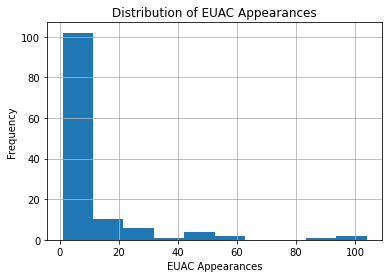

In [83]:
# Histogram of EUAC Appearances
statsdf['EUAC Appearances'].hist()

# add labels and title
plt.xlabel('EUAC Appearances')
plt.ylabel('Frequency')
plt.title('Distribution of EUAC Appearances')

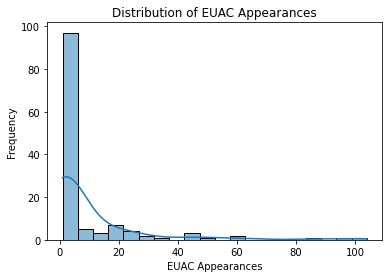

In [84]:
# Histogram with KDE curve
sns.histplot(statsdf['EUAC Appearances'], kde=True, bins=20)

# Labels and title
plt.xlabel('EUAC Appearances')
plt.ylabel('Frequency')
plt.title('Distribution of EUAC Appearances')
plt.show()

In [85]:
# 10 Most Active Players sorted by appearances
statsdf.sort_values(by="EUAC Appearances", ascending=False).head(10)

,Player_Map,EUAC Appearances
108,YoshiBowser,104
83,Ripha,97
107,Yamber,85
38,Iceman92,62
118,ocrim_ger,62
39,Iloria,50
76,Penzo,47
35,Grimwood96,46
121,replicant___,43
64,Mortal_Instrument,33


In [86]:
statsdf.to_csv("PlayerStats.csv", index=False)

In [87]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances
0,0,164493,2ednar,2ednar,1
1,0,2992428,AU_Leenykins,AU_Leenykins,2
2,0,2942327,Alfon42,Alfon42,10
3,0,4324849,Alistair__,Alistair13,4
4,0,5390120,Alistair__,Alistair__,14


In [88]:
## 4.1.2 Appearance Streaks?

## 4.2 Win/Loss Ratio

Section for determining a player's Win/Loss ratio. <br>
<br>
Two win/loss ratios will be defined. One for "match" winrate and the other for "set" winrate. <br>
Matches will be each individual match a player has played and a set is overall conclusion. <br>
Example: Player A wins 2-1 against Player B. Match winrate for Player A is 66.6% and set winrate is 100%. Just counting this set <br>
Due to multiple accounts existing, the number of sets/matches a player has played will be recorded too as a weight

In [92]:
matchWinrateArray = []
setWinrateArray = []
matchCountArray = []
setCountArray = []

# For every player...
for players in playerdf["Player"]:
    # Variables
    set_win_count = 0
    set_loss_count = 0
    
    match_win_count = 0
    match_loss_count = 0
    
    set_Winrate = 0
    match_Winrate = 0
    
    match_count = 0
    set_count = 0
    
    # For every match get winner, loser, score...
    for wins, losses, scores in zip(df["Winner"], df["Loser"], df["Score"]):
        # If player winner, increment win score
        if wins == players:
            set_win_count += 1
            # Catch DQs
            if scores == "0--1":
                match_win_count += 2
            # Not DQ, take first digit of score.
            else:
                match_win_count += int(scores[0])
                match_loss_count += int(scores[-1])
        elif losses == players:
            set_loss_count += 1
            # Catch DQs
            if scores == "0--1":
                match_loss_count += 2
            # Not DQ, take first digit of score (number their opponent won by...)
            else:
                match_loss_count += int(scores[0])
                match_win_count += int(scores[-1])
                
    # Get the match/set totals
    set_count = set_win_count + set_loss_count
    setCountArray.append(set_count)
        
    match_count = match_win_count + match_loss_count
    matchCountArray.append(match_count)
                
    try:
        # Winrate calculations
        set_Winrate = (set_win_count/set_count) * 100
        match_Winrate = (match_win_count/match_count) * 100
    except ZeroDivisionError:
        set_Winrate = 0
        match_Winrate = 0
        
    # Append to arrays
    setWinrateArray.append(set_Winrate)
    matchWinrateArray.append(match_Winrate)
        
        
# Add to playerdf dataframe
playerdf["Set Winrate"] = setWinrateArray
playerdf["Match Winrate"] = matchWinrateArray
playerdf["Set Count"] = setCountArray
playerdf["Match Count"] = matchCountArray

In [99]:
playerdf[playerdf["EUAC Appearances"] > 5].sort_values(by="Set Winrate", ascending=False).head(50)

,Start ID,Challonge ID,Player_Map,Player,EUAC Appearances,Set Winrate,Match Winrate,Set Count,Match Count
115,0,2771961,Yätta,Yätta,24,78.571429,66.666667,126,384
4,0,5390120,Alistair__,Alistair__,14,77.777778,67.841410,72,227
88,1118825,2491730,Ripha,Ripha,97,75.342466,66.495977,438,1367
86,1152521,2307689,Raffa_,Raffa_,21,68.807339,65.217391,109,299
49,0,2393034,JrARMS,JrARMS,10,68.518519,60.625000,54,160
38,0,1897663,Grimwood96,Grimwood96,46,65.333333,59.509202,225,652
121,0,4353211,Alistair__,deleted4353211,11,64.000000,61.240310,50,129
41,0,2521004,Iceman92,Iceman92,62,63.176895,58.177278,277,801
128,0,2363206,replicant___,replicant___,43,60.891089,56.205674,202,564
69,0,4446934,Mr_Adal,Mr_Adal,16,55.555556,52.791878,72,197


## 2.1 Tournament information

In [16]:
date1 = df[df['EUAC'] == '1']["Date"][0]
print(result)

2017-10-21


### 2.1.1 How many Tournaments have there been? 

In [14]:
df["Tournament No"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111], dtype=int64)

There have been 111 EUACs

In [15]:
df["MatchNo"].mean()

11.574302697759489

Average EUAC has ~11.6 matches 

In [ ]:
df["MatchNo"]

## 2.1 Most Common Score

In [5]:
df["Score"].unique()

array(['2-0', '0--1', '2-1', '3-1', '3-0', '3-2'], dtype=object)

In [6]:
values = df["Score"].value_counts()
values

2-0     1195
2-1      508
3-1      144
3-0      135
3-2      122
0--1      83
Name: Score, dtype: int64

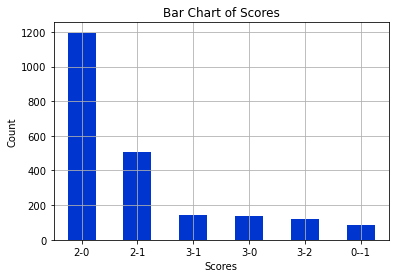

In [7]:
values.plot(kind="bar", color="#0035d0", grid=True)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.xticks(rotation="0")
plt.title("Bar Chart of Scores")
plt.show()

Most common score is a 2-0. Out numbering the next highest, 2-1, by double <br>
"Finals" are less common but they are roughly the same. But 3-2 is the lowest indicating that Finals are not generally all that even 

## 2.2 Correlations

In [8]:
heat = df.corr()

In [9]:
heat

,MatchNo,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
MatchNo,1.000000,-0.027995,-0.169150,-0.211780,-0.341174,-0.276771
P1 Seed,-0.027995,1.000000,0.700772,0.441375,0.446473,-0.244598
P1 Placement,-0.169150,0.700772,1.000000,0.527211,0.471855,-0.223788
P2 Seed,-0.211780,0.441375,0.527211,1.000000,0.754884,-0.314577
P2 Placement,-0.341174,0.446473,0.471855,0.754884,1.000000,-0.211962
Tournament No,-0.276771,-0.244598,-0.223788,-0.314577,-0.211962,1.000000


<AxesSubplot:>

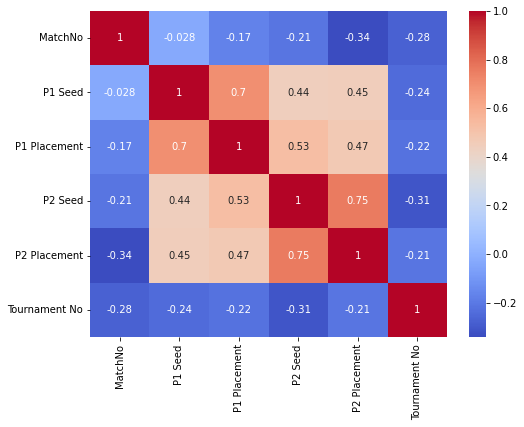

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data=heat, annot=True, cmap="coolwarm")

High correlation between a player's seeding and their placement (0.7 for Player 1 and 0.75 for Player 2). <br>
Suggesting that players are usually seeded appropriately

## Who are the strongest players?

###  Each player who has won an EUAC

In [11]:
# Add players to a set that have had a placement of 1. Sets don't contain duplicates
players = set()
for i in playerdf["Player_Map"]:
    for a,b,c,d in zip(df["Player1"], df["Player2"], df["P1 Placement"], df["P2 Placement"]):
        if i == a:
            if c == 1:
                players.add(i)
                continue
            else:
                continue
        if i == b:
            if d == 1:
                players.add(i)
                continue
            else:
                continue

In [12]:
players

{'Alistair__',
 'D2S_Maxou',
 'Frank001',
 'Grimwood96',
 'Iceman92',
 'JrARMS',
 'Raffa_',
 'Ripha',
 'Shedy',
 'Yamber',
 'Yätta',
 'replicant___'}

In [17]:
len(players)

12

12 Players have won at least one EUAC throughout its run

### Amount of EUACs won by player

### Win Streaks

In [18]:
counts = (
    df.melt(id_vars="Tournament No", value_vars=["Winner", "Loser"])
      .drop("variable", axis=1)
      .drop_duplicates()
      .groupby("Tournament No")
      .size()
      .reset_index(name="PlayerCount")
)

print(counts)

     Tournament No  PlayerCount
0                1           22
1                2           12
2                3           12
3                4            9
4                5           25
..             ...          ...
106            107           12
107            108           10
108            109           10
109            110            9
110            111            7

[111 rows x 2 columns]


In [19]:
counts.sort_values(by="PlayerCount", ascending=False)

,Tournament No,PlayerCount
4,5,25
0,1,22
5,6,19
14,15,18
51,52,18
...,...,...
80,81,6
34,35,6
85,86,5
82,83,5


EUAC 5 had the highest number of entrants with 25 competing whilst EUACs 83,85 and 86 has the lowest with only 5 participating

In [32]:
avg = counts["PlayerCount"].mean()
med = counts["PlayerCount"].median()

In [35]:
f"The Average EUAC has {avg:.2f} players per tournament and a median of {med}"

'The Average EUAC has 10.68 players per tournament and a median of 10.0'

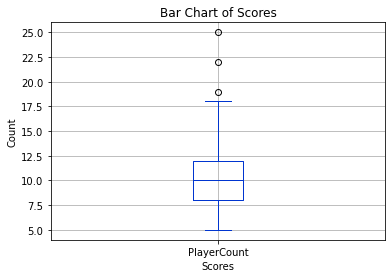

In [31]:
counts["PlayerCount"].plot(kind="box", color="#0035d0", grid=True)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.xticks(rotation="0")
plt.title("Bar Chart of Player Count")
plt.show()

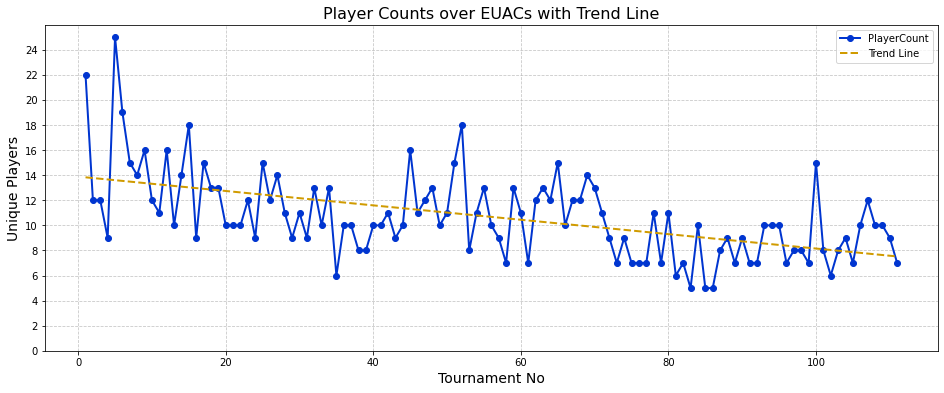

In [22]:
# Scatter plot + line
plt.figure(figsize=(16, 6))
ax = plt.gca() #Keep everything on same plot

# Line plot
counts.plot(x="Tournament No", y="PlayerCount", kind="line", marker='o', ax=ax, linewidth=2, color="#0035d0")

# Trend line
z = np.polyfit(counts["Tournament No"], counts["PlayerCount"], 1)
p = np.poly1d(z)
plt.plot(counts["Tournament No"], p(counts["Tournament No"]), linewidth=2, label="Trend Line", linestyle='--', color="#d09b00")

# Labels and title
plt.title("Player Counts over EUACs with Trend Line", fontsize=16)
plt.xlabel("Tournament No", fontsize=14)
plt.ylabel("Unique Players", fontsize=14)
plt.legend()

# Set y-axis to only show whole numbers
max_count = counts["PlayerCount"].max()
plt.yticks(np.arange(0, max_count + 1, 2))  # from 0 to max, step by 1

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Downward trend. This shows that the tournament series is losing players, slowly, throughout its run. It is approximately losing 0.05 players per tournament

In [25]:
# Correlation
correlation = counts["Tournament No"].corr(counts["PlayerCount"])
print(f"Correlation between Tournament No and Player Count: {correlation:.2f}") #Two decimal places

# Trend line equation
z = np.polyfit(counts["Tournament No"], counts["PlayerCount"], 1)
slope, intercept = z
print(f"Trend Line Equation: PlayerCount = {slope:.2f} * Tournament No + {intercept:.2f}")

Correlation between Tournament No and Player Count: -0.54
Trend Line Equation: PlayerCount = -0.06 * Tournament No + 13.89
